Agents are connected but have their own states. Only the final responses are appended to global state

<img src="../../resources/images/multi_agent_supervisor.png" alt="Multi Agent Supervisor" height="300" width="300">

Agents are independent LangChain agents. This means they have their own individual prompt, LLM, and tools.

In [1]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True)
# from src.langchain.lg_workflow import *
from src.langchain_flow.agents.framenet_agent import *
from src.langchain_flow.agents.flanagan_agent import *
from src.langchain_flow.agents.pycram_agent import *
from src.langchain_flow.agents.enhanced_ad_agent import *
# from src.langchain.agents.pycram_corrector_agent import *
from src.langchain_flow.agents.websearch_agent import *
from src.langchain_flow.e2e_workflow import *
from src.resources.pycram.pycram_failures import *
from src.resources.pycram.pycram_action_designators import *
config = {"configurable" : {"thread_id" : 1}}

Trying OLLAMA model 14b
OLLAMA model found
Sub Agent Creation


## Ad Agent

In [ ]:
input_question = "the person picks up a brown onion"
for s in ad_agent.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")

In [ ]:
ad_agent.invoke({'messages': [("user", "pick up the blue cup and go to sink")]})

## Framenet Agent

In [ ]:
fnr = framenet_tool.invoke({'instruction':'pour water from cup into sink'})
fnr

In [ ]:
print(graph.get_state(config))

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "framenet representation of the action instruction pour water from the bottle into the container."
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")


In [ ]:
graph.get_state(config)

In [ ]:
graph.invoke({'messages': [HumanMessage(content='framenet representation of the action pick up the cup from the fridge')]}, config=config)['messages'][0].content

In [ ]:
graph.get_state(config=config)

In [ ]:
# graph.get_state(config=config).values['messages'][-1].content
framenet_answers

In [ ]:
graph.invoke({'messages': [HumanMessage(content='framenet representation of the action pick up the mug from the fridge')]})['messages'][1].content

## Flanagan Agent

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "flanagan representation of the action instruction pour water from the bottle into the container."
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")


In [ ]:
graph.invoke({'messages': [HumanMessage(content='flanagan representation of instruction pickup the bottle from the fridge')]}, config=config)['messages'][1].content

In [ ]:
flanagan_agent.invoke({'messages': [HumanMessage(content='flanagan representation of instruction pour water from the bottle into the container')]})

In [ ]:
from IPython.display import display, Image
# display(Image(math_agent.get_graph().draw_mermaid_png()))
# display(Image(websearch_agent.get_graph().draw_mermaid_png()))
# display(Image(framenet_agent.get_graph().draw_mermaid_png()))
# display(Image(graph.get_graph().draw_mermaid_png()))

## Pycram Agent

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "pick up the cup and go to sink"
for s in pycram_agent.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True,
    config=config,
):
    print(s)
    print("----")


In [ ]:
pycram_agent.invoke({"messages" : [HumanMessage(content="pick up the cup from the sink nad place it on the table")]})
# pycram_agent.invoke({"messages": "pick up the cup from the sink"})

In [ ]:
instruction_for_populator = {
        "instruction": "pick up the cup from the sink",
        "model_names": ["PickUpAction"]
    }

In [ ]:
res = model_selector.invoke("pick up the cup from the sink")
res

In [ ]:
res = model_populator.invoke({"instruction":"pick up the cup from the sink", "model_names": ["PickUpAction"]})
res

In [ ]:
print(res['populated_models'])

## Other Agents

In [ ]:
from IPython.display import display, Image
display(Image(sole.get_graph().draw_mermaid_png()))

In [ ]:
test_obj = ObjectModel(name="cup",concept="cup", color="blue")
test_robot = ObjectModel(name="robot", concept="robot")
test_links = [Link(name="gripper_link"), Link(name="wrist_link")]
test_pose = PoseStamped(pose=Pose(
    position=Vector3(x=1.0, y=2.0, z=3.0),
    orientation=Quaternion(x=0.0, y=0.0, z=0.0, w=1.0)))

action_designator = """PickUpAction(object_designator=test_obj, arm=Arms.LEFT,
                                 grasp_description=GraspDescription(approach_direction=Grasp.TOP,vertical_alignment=Grasp.TOP, rotate_gripper=True))"""
grasping_error = "ObjectNotGraspedErrorModel(obj=test_obj, robot=test_robot, arm=Arms.LEFT, grasp=Grasp.TOP)"

In [ ]:
sole.invoke({"action_designator": action_designator, "reason_for_failure": grasping_error, "human_comment" : "pick the blue bottle not the cup"})

In [ ]:
# update_agent.invoke({"action_designator": action_designator, "reason_for_failure": grasping_error, "human_comment" : "pick the blue bottle not the cup"})

In [ ]:
# for s in designator_updater.stream({"action_designator" : action_designator, "reason_for_failure" : grasping_error,
#                                "human_comment" : "i want to pick up the pink bottle not the blue cup"}):
#     print(s)

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "what is 2 times 2"
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True, config=config
):
    print(s)
    print("----")


In [ ]:
graph.get_state(config=config)

In [ ]:
# Example: Complex Query Using Multiple Agents
input_question = "what is the value of 2 + 10"
for s in graph.stream(
    {"messages": [("user", input_question)]},
    subgraphs=True
):
    print(s)
    print("----")


In [ ]:
# # Example: Complex Query Using Multiple Agents
# input_question = "who is apple company founder"
# for s in graph.stream(
#     {"messages": [("user", input_question)]},
#     subgraphs=True
# ):
#     print(s)
#     print("----")


In [ ]:
# # Example: Complex Query Using Multiple Agents
# input_question = "who is the ceo of google and what is the framenet representation of apple"
# for s in graph.stream(
#     {"messages": [("user", input_question)]},
#     subgraphs=True
# ):
#     print(s)
#     print("----")


In [ ]:
# # Example: Complex Query Using Multiple Agents
# input_question = "who is the ceo of google, what is the framenet representation of apple and how much is 2 times 10"
# for s in graph.stream(
#     {"messages": [("user", input_question)]},
#     subgraphs=True
# ):
#     print(s)
#     print("----")


## Practice

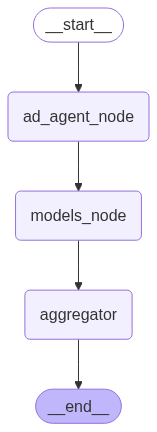

In [2]:
from IPython.display import display, Image
display(Image(e2e_graph.get_graph().draw_mermaid_png()))

In [ ]:
for chunk in e2e_graph.stream({"instruction" : 'pour the water from the mug into sink'}, subgraphs=True, config=config):
    print(chunk)
    print("----")

In [3]:
final_state = e2e_graph.invoke({"instruction" : 'pour the water from the mug into sink'}, config=config)

INSIDE ACTION NODE
type={'action': 'Pouring'}
['Pouring']
INSIDE CRAM NODE
cram_plan (perform (an action (type pour-from-container) (source (an object (type {source}){source_props}) (contains (a substance (type {stuff}){stuff_props}))))(count (unit {unit}){unit_props}(number {amount}){amount_props}))(a location (in {goal}){goal_props}))
----------
{
  "stuff": "water",
  "source": "mug",
  "goal": "sink",
  "action_verb": "pour",
  "unit": null,
  "amount": null
}
----------
fCONTEXT 
{
  "stuff": "water",
  "source": "mug",
  "goal": "sink",
  "action_verb": "pour",
  "unit": null,
  "amount": null,
  "stuff_props": {
    "color": "clear",
    "transparency": "transparent",
    "texture": "liquid",
    "odor": "none"
  },
  "source_props": {
    "shape": "cylindrical",
    "material": "ceramic",
    "size": "medium",
    "handle": "present"
  },
  "goal_props": {
    "position": "under",
    "shape": "irregular",
    "material": "metal"
  }
}
----------
(perform (an action (type pour-

ValidationError: 3 validation errors for FlanaganStateInternal
premotion_phase
  Field required [type=missing, input_value={'instruction': 'pour the...ar) (material metal)))'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/missing
phaser
  Field required [type=missing, input_value={'instruction': 'pour the...ar) (material metal)))'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/missing
flanagan
  Field required [type=missing, input_value={'instruction': 'pour the...ar) (material metal)))'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/missing